In [ ]:
"""
RNN

RNN에서 입력데이터 크기 동일해야 함

시계열데이터 - 번역기에 많이 사용됨
시간의 흐름이 없는데 무슨 시계열 데이터?????
말의 순서(시간)에 따른 데이터기 때문이다. 다음 말,문장의 예측 가능

단점
문장이 길어지면 다음을 잘 예측하지 못한다.
전달을 하는 과정에서 앞쪽에 있던 정보가 손실된다.

문제점을 해결하기 위해 LSTM(Long Short Term Memory) 사용  +)GRU
LSTM 구조 : 출력층이 2개. 오래되더라도 중요한 정보를 따로 전달하는 층이 존재한다.

"""

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN  #Embedding : 차원을 줄여주는 역할
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
model = Sequential()

In [ ]:
# 입력, 히든계층은 주로 활성화 함수로 relu 가 사용됨       vanishing gradient 우려
model.add(Dense(2,input_dim=3, activation='softmax'))

In [ ]:
model.summary()   # weight : 3*2개 (입력 * 출력)  +  b : 2개  (출력 개수만큼)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 40        
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
Total params: 94
Trainable params: 94
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
# fully connected
model.add(Dense(8,input_dim=4, activation='relu')) #leaky relu
model.add(Dense(6, activation='relu')) # 자동으로 input_dim = 8
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 40        
                                                                 
 dense_13 (Dense)            (None, 6)                 54        
                                                                 
 dense_14 (Dense)            (None, 3)                 21        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tok = Tokenizer()

In [ ]:
train='Can I look around?'

In [ ]:
tok.fit_on_texts([train])  #vocab 생성

In [ ]:
tok.index_word
# tok.word_index

{'can': 1, 'i': 2, 'look': 3, 'around': 4}

In [ ]:
# 새로운 문장을 인코딩
text="Can I look at my phone after lasik"

In [ ]:
seq = tok.texts_to_sequences([text])[0]  #텍스트 숫자로 변환
seq

[1, 2, 3]

In [ ]:
pad_sequences([[1,2,3],[2,3],[3,4,5,6]], maxlen = 3)
pad_sequences([[1,2,3],[2,3],[3,4,5,6]], maxlen = 3, padding='pre')  # padding 이 post 이면 벡터처리 마지막에 0이 중요한 역할을 하게 됨   > 역전파의 경우에는 반대

array([[1, 2, 3],
       [2, 3, 0],
       [4, 5, 6]], dtype=int32)

In [ ]:
"""
원핫인코딩 : 메모리를 많이 차지. 0 또는 1
임베디드 벡터 : 메모리 적게 차지, 실수

ex) 1만차원 원핫벡터 -> 10차원 임베딩벡터
model.add(Embedding(1만(vocab_size),10(output_dim),3(입력길이)))

"""

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
news=fetch_20newsgroups(subset='train') #교육용 데이터로써 train / test 분리되어 있음

In [ ]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
df = pd.DataFrame(news.data,columns=['article'])

In [ ]:
df['target'] = news.target

In [ ]:
df

,article,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


<Axes: >

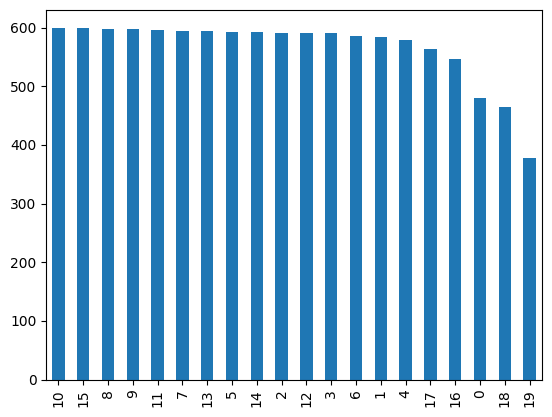

In [ ]:
df['target'].value_counts().plot(kind='bar')

In [ ]:
test = fetch_20newsgroups(subset='test',shuffle=True)

In [ ]:
len(test.data)

7532

In [ ]:
len(test)

5

In [ ]:
train_article=df['article']
train_target=df['target']

In [ ]:
test_article=test.data
test_target=test.target

In [ ]:
len(train_article)
len(train_target)
len(test_article)
len(test_target)

7532

In [ ]:
def pre_processing_data(trainData, testData, ty):#(트레인,테스트,유형분류)
    tok=Tokenizer(num_words=10000)   #전체가 아닌 단어 개수제한
    tok.fit_on_texts(trainData)     #번호 부여
    xtrain=tok.texts_to_matrix(trainData, mode=ty)
    xtest=tok.texts_to_matrix(testData, mode=ty)
    return xtrain, xtest, tok.index_word

In [ ]:
xtrain, xtest,indexWord=pre_processing_data(train_article, test_article, "binary")

In [ ]:
indexWord

In [ ]:
# 원핫인코딩
ytrain=to_categorical(train_target, 20)
ytest=to_categorical(test_target, 20)

In [ ]:
ytrain.shape

(11314, 20)

In [ ]:
# 신경망 모델

In [ ]:
model=Sequential()
model.add(Dense(256, input_shape=(10000,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(20, activation='softmax'))
#모델링 환경 변수 설정
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
#모델링(트레이닝)
model.fit(xtrain, ytrain, batch_size=128, epochs=5, verbose=1,
          validation_split=0.1)

Epoch 1/5
80/80 [==============================] - 7s 80ms/step - loss: 1.3155 - accuracy: 0.7030 - val_loss: 0.4879 - val_accuracy: 0.8816
Epoch 2/5
80/80 [==============================] - 5s 61ms/step - loss: 0.1925 - accuracy: 0.9615 - val_loss: 0.3589 - val_accuracy: 0.8966
Epoch 3/5
80/80 [==============================] - 6s 73ms/step - loss: 0.0565 - accuracy: 0.9948 - val_loss: 0.3283 - val_accuracy: 0.9028
Epoch 4/5
80/80 [==============================] - 6s 70ms/step - loss: 0.0246 - accuracy: 0.9981 - val_loss: 0.3303 - val_accuracy: 0.9019
Epoch 5/5
80/80 [==============================] - 5s 58ms/step - loss: 0.0146 - accuracy: 0.9988 - val_loss: 0.3393 - val_accuracy: 0.9028


In [ ]:
score=model.evaluate(xtest, ytest, batch_size=128, verbose=0)
print(score)

[0.7297184467315674, 0.8142591714859009]
